In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [14]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [15]:
df['Postal Code'].fillna(0, inplace=True)

In [31]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [32]:
# changing the data type of postal code to int
df['Postal Code'] = df['Postal Code'].astype(int)

## data description

In [33]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Data cleaning
### checking duplicated

In [35]:
if df.duplicated().sum() > 0:
    print('There are duplicated values')
else:
    print('There are no duplicated values')

There are no duplicated values


In [ ]:
df.drop_duplicates(inplace=True)

In [36]:
df.duplicated(keep=False).sum()

0

## Exploratory data Analysis

### Customer analysis
#### Customer Segmentation

In [40]:
# type of customers
type_of_customers = df['Segment'].unique()
print(type_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [48]:
# number of customers
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment': 'Customer Type', 'count': 'Total Customers'})
print(number_of_customers)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


Text(0.5, 1.0, 'Distribution of Customers')

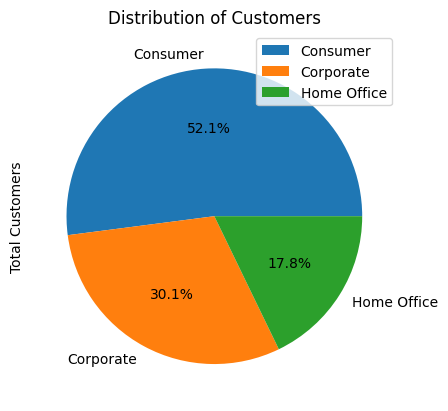

In [57]:
number_of_customers.plot.pie(y='Total Customers', labels=number_of_customers['Customer Type'], autopct='%1.1f%%')
plt.title('Distribution of Customers')

#### Customers and Sales

In [58]:
sales_by_customer_type = df.groupby('Segment')['Sales'].sum().reset_index()
sales_by_customer_type = sales_by_customer_type.rename(columns={'Segment': 'Customer Type', 'Sales': 'Total Sales'})
print(sales_by_customer_type)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


Text(0.5, 1.0, 'Sales by Customer Type')

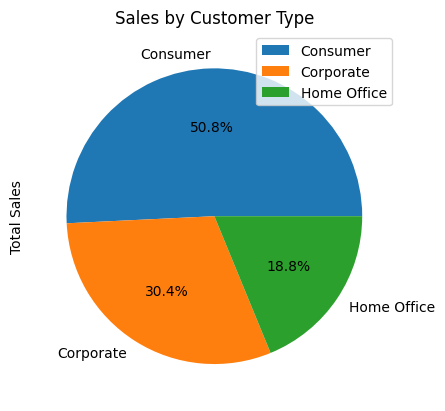

In [67]:
sales_by_customer_type.plot.pie(y='Total Sales', labels = sales_by_customer_type['Customer Type'], autopct='%1.1f%%')
plt.title('Sales by Customer Type')

### Customer Loyalty

In [103]:
customer_order_freq =df.groupby(["Customer ID", "Customer Name", "Segment"])['Order ID'].count().reset_index()
customer_order_freq.rename(columns={'Order ID': 'Total Orders'},  inplace=True)

# Repeat customers
repeat_customers = customer_order_freq[customer_order_freq['Total Orders'] >= 1]

# Sorted by total orders
sorted_repeat_customers = repeat_customers.sort_values('Total Orders', ascending=False)
top10_loyalties = sorted_repeat_customers.head(10).reset_index(drop=True)
top10_loyalties

,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,SV-20365,Seth Vernon,Consumer,32
6,JD-15895,Jonathan Doherty,Corporate,32
7,AP-10915,Arthur Prichep,Consumer,31
8,ZC-21910,Zuschuss Carroll,Consumer,31
9,EP-13915,Emily Phan,Consumer,31


<Axes: xlabel='Customer Name'>

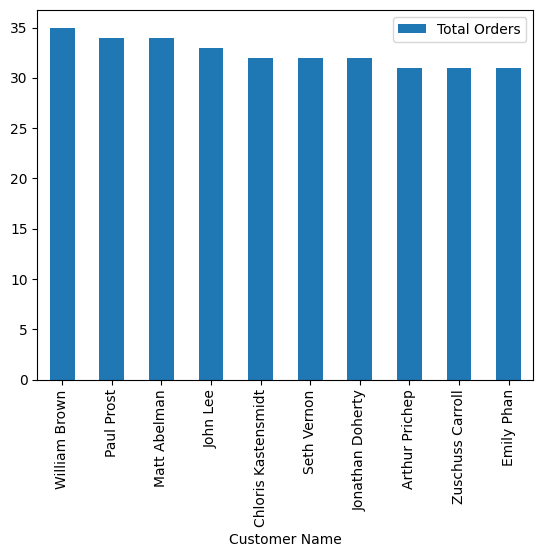

In [104]:
top10_loyalties.plot.bar(x='Customer Name', y='Total Orders')

In [91]:
top10_spenders = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(10)

<Axes: xlabel='Customer Name'>

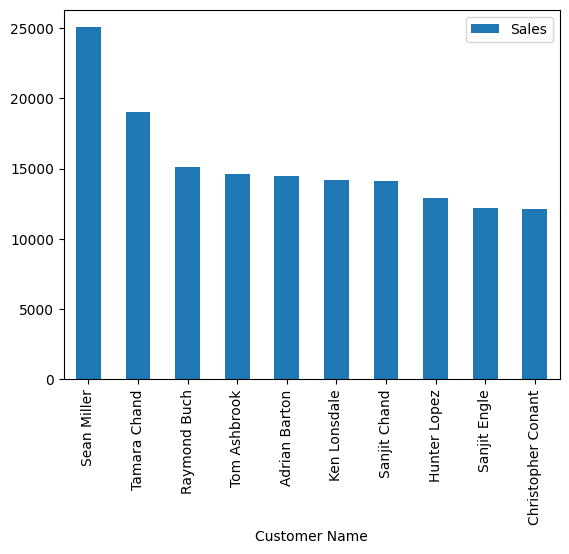

In [92]:
top10_spenders.plot.bar(x='Customer Name', y='Sales')

## Model of Shipping

In [105]:
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775


In [106]:
type_of_shipping = df['Ship Mode'].unique()
print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [112]:
# frequenzy of shipping
shipping_freq = df['Ship Mode'].value_counts().reset_index()
shipping_freq = shipping_freq.rename(columns={'Ship Mode': 'Shipping Type', 'count': 'Total Orders'})

In [113]:
print(shipping_freq)

    Shipping Type  Total Orders
0  Standard Class          5859
1    Second Class          1902
2     First Class          1501
3        Same Day           538


<Axes: ylabel='Total Orders'>

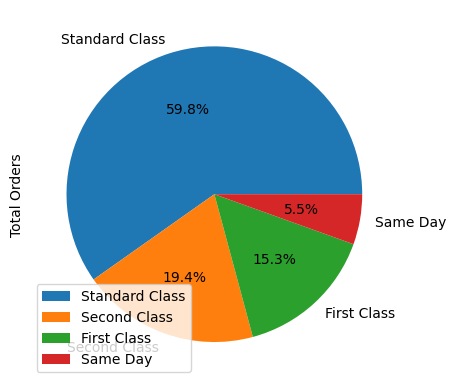

In [114]:
shipping_freq.plot.pie(y='Total Orders', labels=shipping_freq['Shipping Type'], autopct='%1.1f%%')

## Geographical Analysis

In [117]:
# Order by State
order_by_state = df.groupby('State')['Order ID'].count().reset_index()
order_by_state = order_by_state.rename(columns={'Order ID': 'Total Orders'}).sort_values(by='Total Orders', ascending=False)
print(order_by_state)

                   State  Total Orders
3             California          1946
30              New York          1097
41                 Texas           973
36          Pennsylvania           582
45            Washington           504
11              Illinois           483
33                  Ohio           454
8                Florida           373
20              Michigan           253
31        North Carolina           247
44              Virginia           224
1                Arizona           223
40             Tennessee           183
4               Colorado           179
9                Georgia           177
15              Kentucky           137
12               Indiana           135
19         Massachusetts           135
28            New Jersey           122
35                Oregon           122
18              Maryland           105
47             Wisconsin           105
6               Delaware            93
21             Minnesota            89
5            Connecticut 

<Axes: xlabel='State'>

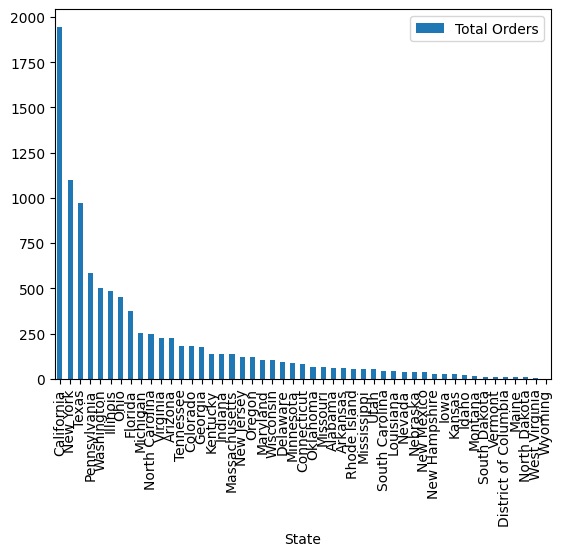

In [118]:
order_by_state.plot.bar(x='State', y='Total Orders')

In [121]:
# Sales by City
sales_by_city = df.groupby('City')['Sales'].sum().reset_index()
sales_by_city = sales_by_city.rename(columns={'Sales': 'Total Sales'}).sort_values(by='Total Sales', ascending=False).head(10)
print(sales_by_city)

              City  Total Sales
327  New York City  252462.5470
265    Los Angeles  173420.1810
450        Seattle  116106.3220
436  San Francisco  109041.1200
372   Philadelphia  108841.7490
207        Houston   63956.1428
80         Chicago   47820.1330
435      San Diego   47521.0290
216   Jacksonville   44713.1830
123        Detroit   42446.9440


<Axes: xlabel='City'>

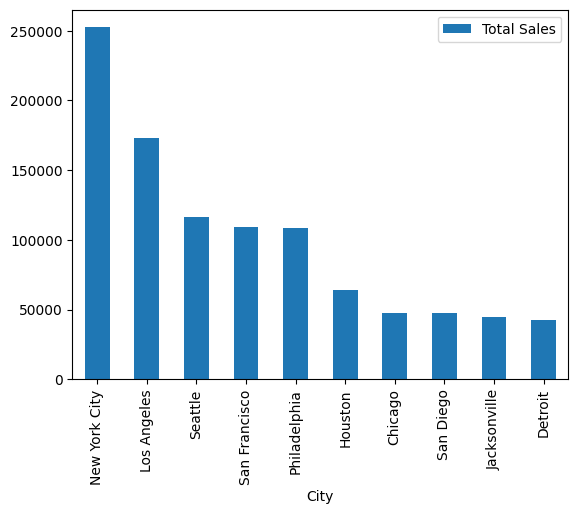

In [122]:
sales_by_city.plot.bar(x='City', y='Total Sales')

## Product Analysis

In [126]:
products_category = df['Category'].unique()
print(products_category)

['Furniture' 'Office Supplies' 'Technology']


In [135]:
sub_category_count = df.groupby('Category')['Sub-Category'].unique().reset_index()
sub_category_count

,Category,Sub-Category
0,Furniture,"[Bookcases, Chairs, Tables, Furnishings]"
1,Office Supplies,"[Labels, Storage, Art, Binders, Appliances, Pa..."
2,Technology,"[Phones, Accessories, Machines, Copiers]"


## Sales

In [138]:
# Convert order date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Order Date']

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]

### Year sales trend

In [151]:
year_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
year_sales.sort_values(by='Order Date', ascending=False)

<Axes: xlabel='Order Date'>

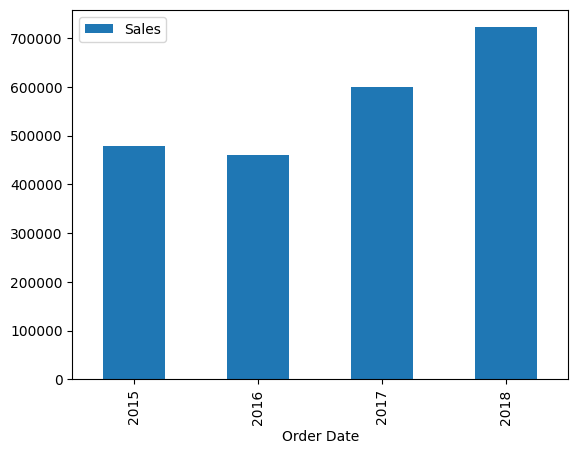

In [146]:
year_sales.plot.bar(x='Order Date', y='Sales')

Text(0, 0.5, 'Sales')

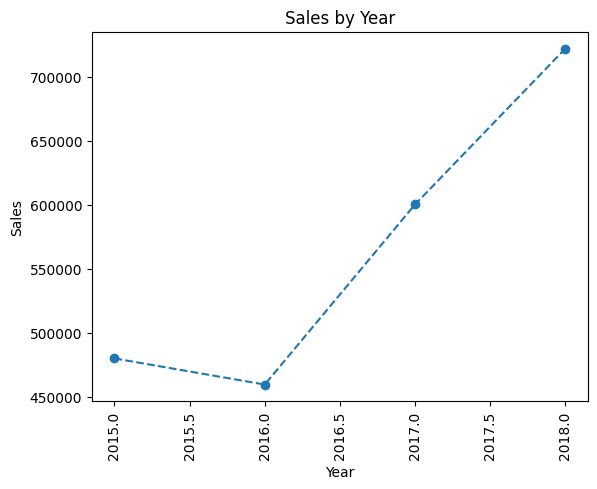

In [150]:
# plotting the line graph
plt.plot(year_sales['Order Date'], year_sales['Sales'], marker='o', linestyle='--')
plt.xticks(rotation=90)
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')

## Monthly Trend Sale in 2018

In [184]:
year_sales = df [df['Order Date'].dt.year == 2018]
year_sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
12,13,CA-2018-114412,2018-04-15,20/04/2018,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552
23,24,US-2018-156909,2018-07-16,18/07/2018,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372
34,35,CA-2018-107727,2018-10-19,23/10/2018,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472
41,42,CA-2018-120999,2018-09-10,15/09/2018,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168
43,44,CA-2018-139619,2018-09-19,23/09/2018,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,32935,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9768,9769,CA-2018-142328,2018-12-07,14/12/2018,Standard Class,TC-21535,Tracy Collins,Home Office,United States,San Francisco,California,94122,West,OFF-PA-10000380,Office Supplies,Paper,"REDIFORM Incoming/Outgoing Call Register, 11"" ...",50.040
9787,9788,CA-2018-144491,2018-03-27,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.332
9788,9789,CA-2018-144491,2018-03-27,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558
9789,9790,CA-2018-144491,2018-03-27,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070,Central,TEC-AC-10004901,Technology,Accessories,Kensington SlimBlade Notebook Wireless Mouse w...,39.992


In [194]:
monthly_sales = year_sales.resample(rule='M', on='Order Date')['Sales'].sum()
monthly_sales

Order Date
2018-01-31     43476.4740
2018-02-28     19920.9974
2018-03-31     58863.4128
2018-04-30     35541.9101
2018-05-31     43825.9822
2018-06-30     48190.7277
2018-07-31     44825.1040
2018-08-31     62837.8480
2018-09-30     86152.8880
2018-10-31     77448.1312
2018-11-30    117938.1550
2018-12-31     83030.3888
Freq: M, Name: Sales, dtype: float64

In [197]:
monthly_sales = monthly_sales.reset_index()

In [198]:
monthly_sales = monthly_sales.rename(columns={'Order Date': 'Month', 'Sales': 'Total Sales'})
monthly_sales

,Month,Total Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312


<Axes: xlabel='Month'>

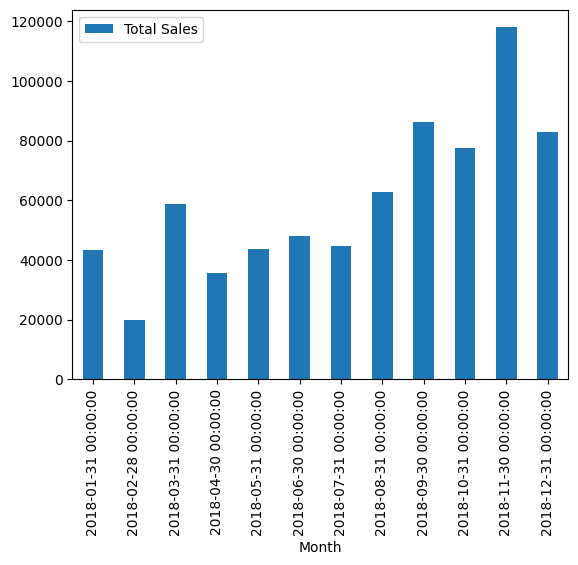

In [199]:
monthly_sales.plot.bar(x='Month', y='Total Sales')